In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\manis\OneDrive\Desktop\Major Poject\10C Final Review\emotion_dataset.csv")

In [3]:
data

,Emotion,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,neutral,Why ?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,joy,Sage Act upgrade on my to do list for tommorow.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,joy,Such an eye ! The true hazel eye-and so brill...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35044,sadness,My elderly friend's eyes seem to hold more sto...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35045,fear,It's as if my older neighbor's usual optimism ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35046,anger,"Sometimes, my senior friend's anger appears as...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35047,sadness,here are times when my older loved one's face ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dropping unused columns
data = data.drop(data.columns[[2,3, 4,5,6,7,8,9]], axis=1)  

In [5]:
import re
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Replace specific substrings
    text = text.replace('&quot;', '')
    text = text.replace('â€™', '')
    text = text.replace('&amp;', '')
    text = text.replace('â˜â˜¾', '')
    text = text.replace('~unk', '')
    text = text.replace('@', '')
    text = text.replace(':', '')
    text = text.replace('TVî€Œ', '')
    text = text.replace('&gt;', '')
    text = text.replace('&lt;', '')
    text = text.replace('/', '')
    text = text.replace('â€¦', '')
    
    return text


In [6]:
data['Text'] = data['Text'].apply(preprocess_text)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Text'])

In [8]:
data

,Emotion,Text
0,neutral,why ?
1,joy,sage act upgrade on my to do list for tommorow.
2,sadness,on the way to my homegirl baby funeral!!! man ...
3,joy,such an eye ! the true hazel eye-and so brilli...
4,joy,iluvmiasantos ugh babe.. hugggzzz for u .! ba...
...,...,...
35044,sadness,my elderly friend's eyes seem to hold more sto...
35045,fear,it's as if my older neighbor's usual optimism ...
35046,anger,"sometimes, my senior friend's anger appears as..."
35047,sadness,here are times when my older loved one's face ...


In [9]:
data=data.drop(data[['Emotion']],axis=1)

In [10]:
data

,Text
0,why ?
1,sage act upgrade on my to do list for tommorow.
2,on the way to my homegirl baby funeral!!! man ...
3,such an eye ! the true hazel eye-and so brilli...
4,iluvmiasantos ugh babe.. hugggzzz for u .! ba...
...,...
35044,my elderly friend's eyes seem to hold more sto...
35045,it's as if my older neighbor's usual optimism ...
35046,"sometimes, my senior friend's anger appears as..."
35047,here are times when my older loved one's face ...


In [11]:
from nrclex import NRCLex
import pandas as pd

# Function to extract depression-relevant emotion scores for each record
def extract_depression_scores(text):
    # Create NRCLex instance for the text
    nrc_obj = NRCLex(text)
    
    # Get the raw emotion scores
    raw_scores = nrc_obj.raw_emotion_scores
    
    # Extract depression-relevant emotion scores
    sadness_score = raw_scores.get('sadness', 0)
    fear_score = raw_scores.get('fear', 0)
    anger_score = raw_scores.get('anger', 0)
    negative_score = raw_scores.get('negative', 0)
    disgust_score = raw_scores.get('disgust', 0)
    
    # Optionally, combine these scores into an overall depression score
    depression_score = sadness_score + fear_score + anger_score + negative_score + disgust_score
    
    return depression_score

# Example usage:
# Assuming 'data' is your DataFrame and 'Text' is the column containing text data
data['Sentiment_Score'] = data['Text'].apply(extract_depression_scores)


In [12]:
data

,Text,Sentiment_Score
0,why ?,0
1,sage act upgrade on my to do list for tommorow.,0
2,on the way to my homegirl baby funeral!!! man ...,6
3,such an eye ! the true hazel eye-and so brilli...,0
4,iluvmiasantos ugh babe.. hugggzzz for u .! ba...,0
...,...,...
35044,my elderly friend's eyes seem to hold more sto...,3
35045,it's as if my older neighbor's usual optimism ...,6
35046,"sometimes, my senior friend's anger appears as...",6
35047,here are times when my older loved one's face ...,3


In [13]:
# Unique records with negative sentiment scores
data['Sentiment_Score'].unique()

array([ 0,  6,  2,  9,  1,  3,  5,  4, 22, 10, 12,  7,  8, 18, 11, 13, 14,
       20, 17, 15, 26, 81, 21, 19, 25, 23, 16, 27, 35, 45], dtype=int64)

In [14]:


# new column to label records as "Depressed" or "Not Depressed"
def classify_depression(row):
    if row['Sentiment_Score'] > 0:
        return 'Depressed'
    else:
        return 'Not Depressed'

data['depression_label'] = data.apply(classify_depression, axis=1)

data

,Text,Sentiment_Score,depression_label
0,why ?,0,Not Depressed
1,sage act upgrade on my to do list for tommorow.,0,Not Depressed
2,on the way to my homegirl baby funeral!!! man ...,6,Depressed
3,such an eye ! the true hazel eye-and so brilli...,0,Not Depressed
4,iluvmiasantos ugh babe.. hugggzzz for u .! ba...,0,Not Depressed
...,...,...,...
35044,my elderly friend's eyes seem to hold more sto...,3,Depressed
35045,it's as if my older neighbor's usual optimism ...,6,Depressed
35046,"sometimes, my senior friend's anger appears as...",6,Depressed
35047,here are times when my older loved one's face ...,3,Depressed


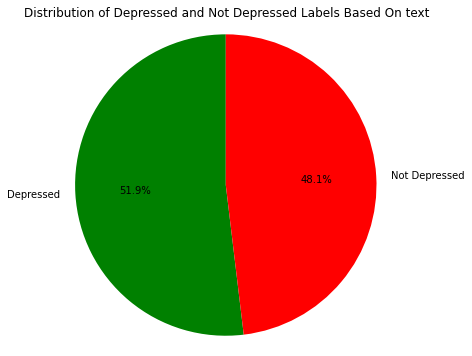

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

text_based_label_counts = data['depression_label'].value_counts()

# Create a pie chart to visualize the distribution with percentages
plt.figure(figsize=(6, 6))
colors = ['green', 'red']  # Define colors for the pie chart
plt.pie(text_based_label_counts, labels=text_based_label_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Depressed and Not Depressed Labels Based On text')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


In [16]:
text_based_depressed_records=data[data['depression_label'] == 'Depressed']
text_based_depressed_records

,Text,Sentiment_Score,depression_label
2,on the way to my homegirl baby funeral!!! man ...,6,Depressed
5,i'm expecting an extremely important phonecall...,2,Depressed
6,.couldnt wait to see them live. if missing the...,9,Depressed
9,1116am drummer boy bij op verzoek van biemoost...,2,Depressed
10,the bull tossed the effigy out of their hands ...,1,Depressed
...,...,...,...
35044,my elderly friend's eyes seem to hold more sto...,3,Depressed
35045,it's as if my older neighbor's usual optimism ...,6,Depressed
35046,"sometimes, my senior friend's anger appears as...",6,Depressed
35047,here are times when my older loved one's face ...,3,Depressed


In [17]:
text_based_depressed_records.shape

(18191, 3)

In [18]:

sentiment_score = text_based_depressed_records['Sentiment_Score']
def classify_depression(sentiment_score):
    if 1 <= sentiment_score <= 15:
        return "Low"
    elif 16 <= sentiment_score <= 30:
        return "Medium"
    else:
        return "High"

# Apply the classification function to the 'sentiment_score' column
text_based_depressed_records['depression_level'] = text_based_depressed_records['Sentiment_Score'].apply(classify_depression)

text_based_depressed_records

C:\Users\manis\AppData\Local\Temp\ipykernel_4376\2903132432.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_based_depressed_records['depression_level'] = text_based_depressed_records['Sentiment_Score'].apply(classify_depression)


,Text,Sentiment_Score,depression_label,depression_level
2,on the way to my homegirl baby funeral!!! man ...,6,Depressed,Low
5,i'm expecting an extremely important phonecall...,2,Depressed,Low
6,.couldnt wait to see them live. if missing the...,9,Depressed,Low
9,1116am drummer boy bij op verzoek van biemoost...,2,Depressed,Low
10,the bull tossed the effigy out of their hands ...,1,Depressed,Low
...,...,...,...,...
35044,my elderly friend's eyes seem to hold more sto...,3,Depressed,Low
35045,it's as if my older neighbor's usual optimism ...,6,Depressed,Low
35046,"sometimes, my senior friend's anger appears as...",6,Depressed,Low
35047,here are times when my older loved one's face ...,3,Depressed,Low


In [19]:
text_based_depressed_records['depression_level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

def depressionLevel_classification_ml_model(data, text_column, level_column):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(data[text_column], data[level_column], test_size=0.2, random_state=42)

    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Train a Multinomial Naive Bayes model for multiclass classification
    ml_model = MultinomialNB()
    ml_model.fit(X_train_tfidf, y_train)

    # Make predictions for depression levels
    ml_predictions = ml_model.predict(X_test_tfidf)

    # Evaluate the machine learning model
    ml_classification_report = classification_report(y_test, ml_predictions,output_dict=True)
    print("Machine Learning Model Classification Report:")
    print(ml_classification_report)



In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

def depressionLevel_classification_dl_model(dataset, text_column, depression_level_column):
    
    X = dataset[text_column]
    y = dataset[depression_level_column]

    # Define hyperparameters
    max_sequence_length = 128
    embedding_dim = 100
    lstm_units = 64
    dropout_rate = 0.5
    batch_size = 64
    epochs = 5

    # Tokenize the text
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)

    # Pad sequences to a fixed length
    X_pad = pad_sequences(X_seq, maxlen=max_sequence_length)

    # Encode depression levels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_encoded = to_categorical(y_encoded, num_classes=3)  # Assuming 3 classes

    # Build the model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Implement early stopping and learning rate reduction
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3)

    # Train the model
    history = model.fit(X_pad, y_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, reduce_lr])
    
    # Get the predicted classes
    y_pred_class = np.argmax(model.predict(X_pad), axis=1)

    # Convert the encoded labels back to their original form
    y_original = label_encoder.inverse_transform(np.argmax(y_encoded, axis=1))
    y_pred_original = label_encoder.inverse_transform(y_pred_class)

    # Evaluate the model using the original labels
    report = classification_report(y_original, y_pred_original,output_dict=True)
    print(report)

# Example usage:
# classification_report = depressionLevel_classification_dl_model(your_dataset, 'text_column', 'depression_level_column')
# print(classification_report)
text_based_dl_model_classification_report = depressionLevel_classification_dl_model(text_based_depressed_records, 'Text', 'depression_level')


Epoch 1/5
256/256 [==============================] - 215s 782ms/step - loss: 0.0597 - accuracy: 0.9915 - val_loss: 0.0308 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 2/5
256/256 [==============================] - 185s 721ms/step - loss: 0.0335 - accuracy: 0.9948 - val_loss: 0.0219 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 3/5
256/256 [==============================] - 185s 721ms/step - loss: 0.0170 - accuracy: 0.9966 - val_loss: 0.0187 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 4/5
256/256 [==============================] - 191s 748ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0221 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 5/5
569/569 [==============================] - 70s 118ms/step


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'High': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, 'Low': {'precision': 0.9997237569060774, 'recall': 0.9998342358271632, 'f1-score': 0.9997789933145477, 'support': 18098}, 'Medium': {'precision': 0.9340659340659341, 'recall': 0.9444444444444444, 'f1-score': 0.9392265193370165, 'support': 90}, 'accuracy': 0.9993953053707878, 'macro avg': {'precision': 0.6445965636573372, 'recall': 0.6480928934238692, 'f1-score': 0.6463351708838547, 'support': 18191}, 'weighted avg': {'precision': 0.9992340435683646, 'recall': 0.9993953053707878, 'f1-score': 0.9993145295886436, 'support': 18191}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
text_based_ml_model_classification_report = depressionLevel_classification_ml_model(text_based_depressed_records, 'Text', 'depression_level')

Machine Learning Model Classification Report:
{'High': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Low': {'precision': 0.9958779884583677, 'recall': 1.0, 'f1-score': 0.9979347377116894, 'support': 3624}, 'Medium': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14}, 'accuracy': 0.9958779884583677, 'macro avg': {'precision': 0.33195932948612256, 'recall': 0.3333333333333333, 'f1-score': 0.3326449125705631, 'support': 3639}, 'weighted avg': {'precision': 0.9917729678958848, 'recall': 0.9958779884583677, 'f1-score': 0.993821239205046, 'support': 3639}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


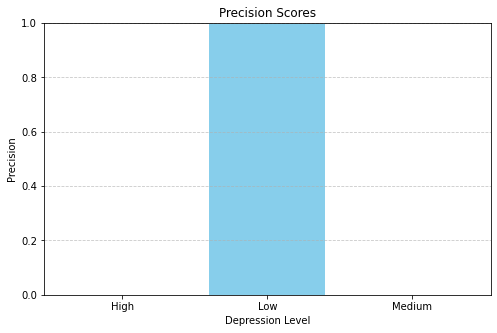

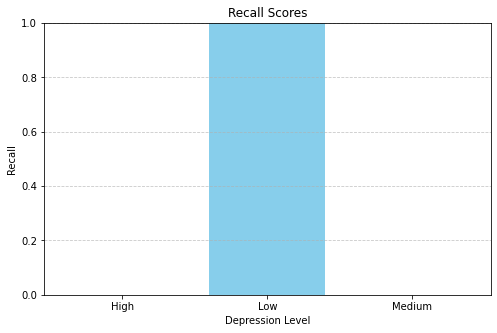

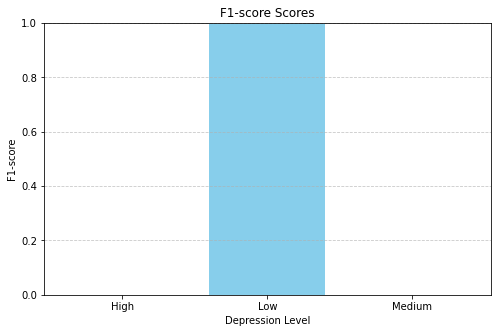

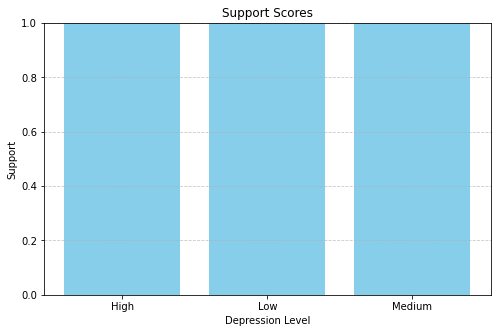

In [23]:
import matplotlib.pyplot as plt

def visualize_classification_report(report):
    labels = list(report.keys())[:-3]  # Extract depression levels ('High', 'Low', 'Medium')
    metrics = ['precision', 'recall', 'f1-score','support']  # Metrics to visualize

    for metric in metrics:
        scores = [report[label][metric] for label in labels]
        plt.figure(figsize=(8, 5))
        plt.bar(labels, scores, color='skyblue')
        plt.title(f'{metric.capitalize()} Scores')
        plt.xlabel('Depression Level')
        plt.ylabel(metric.capitalize())
        plt.ylim(0, 1)  # Set y-axis limit to 0-1
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()



ml_classification_report = {
    'High': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
    'Low': {'precision': 0.9958779884583677, 'recall': 1.0, 'f1-score': 0.9979347377116894, 'support': 3624}, 
    'Medium': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14}, 
    'accuracy': 0.9958779884583677, 
    'macro avg': {'precision': 0.33195932948612256, 'recall': 0.3333333333333333, 'f1-score': 0.3326449125705631, 'support': 3639}, 
    'weighted avg': {'precision': 0.9917729678958848, 'recall': 0.9958779884583677, 'f1-score': 0.993821239205046, 'support': 3639}
}

visualize_classification_report(ml_classification_report)

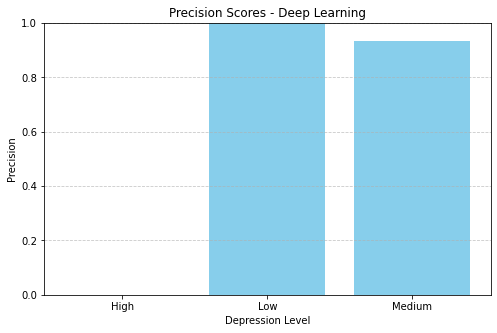

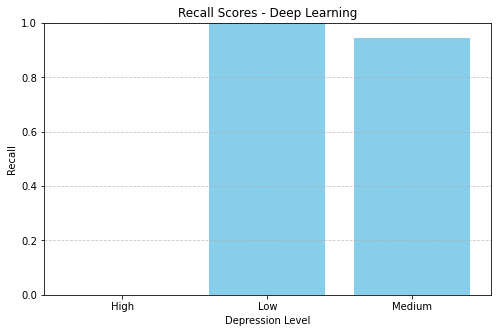

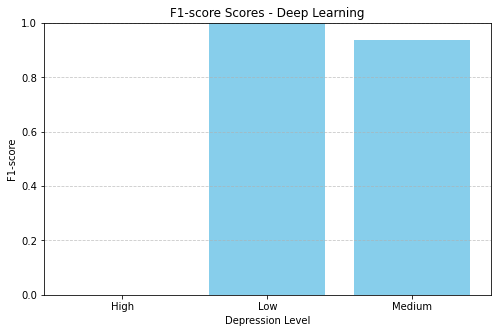

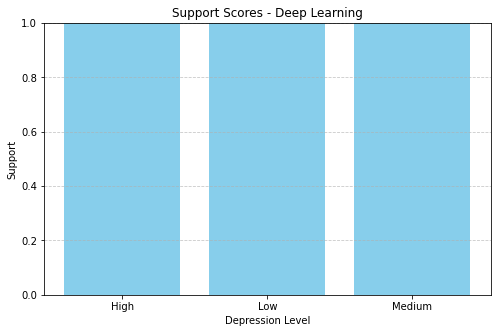

In [25]:
import matplotlib.pyplot as plt

def visualize_classification_report(report):
    labels = ['High', 'Low', 'Medium']  # Depression levels
    metrics = ['precision', 'recall', 'f1-score','support']  # Metrics to visualize

    for metric in metrics:
        scores_dl = [report[label][metric] for label in labels]
        plt.figure(figsize=(8, 5))
        plt.bar(labels, scores_dl, color='skyblue')
        plt.title(f'{metric.capitalize()} Scores - Deep Learning')
        plt.xlabel('Depression Level')
        plt.ylabel(metric.capitalize())
        plt.ylim(0, 1)  # Set y-axis limit to 0-1
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


dl_classification_report = {'High': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, 'Low': {'precision': 0.9997237569060774, 'recall': 0.9998342358271632, 'f1-score': 0.9997789933145477, 'support': 18098}, 'Medium': {'precision': 0.9340659340659341, 'recall': 0.9444444444444444, 'f1-score': 0.9392265193370165, 'support': 90}, 'accuracy': 0.9993953053707878, 'macro avg': {'precision': 0.6445965636573372, 'recall': 0.6480928934238692, 'f1-score': 0.6463351708838547, 'support': 18191}, 'weighted avg': {'precision': 0.9992340435683646, 'recall': 0.9993953053707878, 'f1-score': 0.9993145295886436, 'support': 18191}}

visualize_classification_report(dl_classification_report)

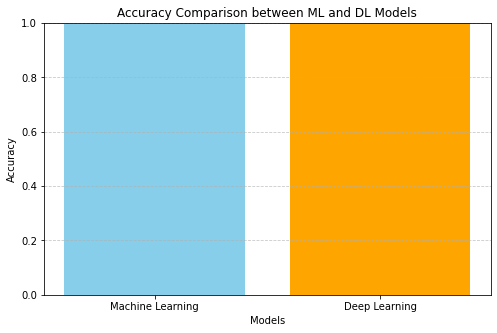

In [26]:
import matplotlib.pyplot as plt

def compare_accuracies(ml_accuracy, dl_accuracy):
    models = ['Machine Learning', 'Deep Learning']
    accuracies = [ml_accuracy, dl_accuracy]

    plt.figure(figsize=(8, 5))
    plt.bar(models, accuracies, color=['skyblue', 'orange'])
    plt.title('Accuracy Comparison between ML and DL Models')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limit to 0-1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage:
ml_accuracy =  0.9958779884583677  # Provide ML model accuracy
dl_accuracy = 0.9993953053707878  # Provide DL model accuracy

compare_accuracies(ml_accuracy, dl_accuracy)

In [75]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import pickle

def depressionLevel_classification_dl_model(dataset, text_column, depression_level_column):
    
    X = dataset[text_column]
    y = dataset[depression_level_column]

    # Define hyperparameters
    max_sequence_length = 128
    embedding_dim = 100
    lstm_units = 64
    dropout_rate = 0.5
    batch_size = 64
    epochs = 50

    # Tokenize the text
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)

    # Pad sequences to a fixed length
    X_pad = pad_sequences(X_seq, maxlen=max_sequence_length)

    # Encode depression levels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_encoded = to_categorical(y_encoded, num_classes=3)  # Assuming 3 classes

    # Build the model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Implement early stopping and learning rate reduction
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3)

    # Train the model
    history = model.fit(X_pad, y_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

    with open('depClasification_model_nrc.pkl', 'wb') as depression_model:
        pickle.dump(model, depression_model)
    
    # Save the tokenizer and label encoder
    with open('tokenizer_nrc.pkl', 'wb') as tokenizer_file:
        pickle.dump(tokenizer, tokenizer_file)

    with open('label_encoder_nrc.pkl', 'wb') as label_encoder_file:
        pickle.dump(label_encoder, label_encoder_file)

    # Save the Keras model
    model.save('depression_model_NRClexicon.h5')

    return model, tokenizer, label_encoder


In [76]:
model, tokenizer, label_encoder = depressionLevel_classification_dl_model(text_based_depressed_records, 'Text', 'depression_level')

Epoch 1/50
256/256 [==============================] - 148s 554ms/step - loss: 0.0621 - accuracy: 0.9914 - val_loss: 0.0312 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 2/50
256/256 [==============================] - 163s 637ms/step - loss: 0.0357 - accuracy: 0.9948 - val_loss: 0.0283 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 3/50
256/256 [==============================] - 174s 679ms/step - loss: 0.0335 - accuracy: 0.9948 - val_loss: 0.0227 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 4/50
256/256 [==============================] - 175s 684ms/step - loss: 0.0178 - accuracy: 0.9955 - val_loss: 0.0242 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 5/50
256/256 [==============================] - 178s 695ms/step - loss: 0.0100 - accuracy: 0.9980 - val_loss: 0.0240 - val_accuracy: 0.9973 - lr: 0.0010
Epoch 6/50
256/256 [==============================] - 180s 704ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0238 - val_accuracy: 0.9973 - lr: 0.0010
Epoch 7/50
256/256 [==========================

In [77]:
# Make predictions using the trained model
def predict_depression_level(user_input, model, tokenizer, label_encoder):
    # Tokenize the user input
    user_input_seq = tokenizer.texts_to_sequences([user_input])
    user_input_pad = pad_sequences(user_input_seq, maxlen=128)
    # Predict depression level
    prediction = model.predict(user_input_pad)
    predicted_level_index = np.argmax(prediction)
    predicted_level = label_encoder.inverse_transform([predicted_level_index])[0]
    return predicted_level

In [ ]:
text = input("Enter text: ")

afinn = Afinn()
# Analyze text data and calculate sentiment scores
score=afinn.score(text)
if(score<0):
    predicted_level = predict_depression_level(text, model, tokenizer, label_encoder)
    print("Predicted depression level:", predicted_level)
else:
    print("you are fine")

In [ ]:
max_sequence_length = 128

In [78]:
# Assuming your dataset is named 'text_based_depressed_records'
high_depression_records = text_based_depressed_records[text_based_depressed_records['depression_level'] == 'High']

# Display the records
print(high_depression_records)


                                                    Text  Sentiment_Score  \
4379   fear fear fear fear fear fear fear fear fear f...               81   
27063                 hate hate hate hate hate hate hate               35   
27503  mad at you. mad at you. mad at you. mad at you...               45   

      depression_label depression_level  
4379         Depressed             High  
27063        Depressed             High  
27503        Depressed             High  
